# Project 1 - Navigation

---

This notebook shows the implementation of DQN in the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Import Necessary Packages

We begin by importing some necessary packages. Also, we import the DQN Agent class implemented in the **dqn_agent.py** file.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
from dqn_agent import DQNAgent

Next, start the Banana environment in Unity.

In [2]:
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Initialize DQN Agent

Reset the Banana environment and obtain the size of the state space and action space for initialization of the DQN agent.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
state_size = len(state)
print('States have length:', state_size)

agent = DQNAgent(state_size=state_size, action_size=action_size, seed=0)

Number of actions: 4
States have length: 37


### 3. Initialize Parameters
The following parameters will be set with their respective default values for the DQN used by the agent.
- No. of Episodes
- Max. Time Steps
- Initialize Epsilon
- End Epsilon
- Epsilon Decay Rate
We can also try varying the values of the parameters for experiment later.

In [5]:
n_episodes=2000
max_t=1000
eps_start=1.0
eps_end=0.01
eps_decay=0.995

### 4. Using a DQN agent
Next, we starts the training. A maximum of 2000 episodes will be run by the agent. In each episodes, the agent will run for a maximum of 1000 steps. At the same time, the agent will employ an exploration-exploitation stragety with initial epsilon 1.0 and decay rate 0.995 per step, until the value reaches the minimum of 0.01.

At the end of the training, the trained weights of the DQN of the agent will be saved locally.

In [6]:
scores = []                                        # initialize the score
scores_window = deque(maxlen=100)                  # last 100 scores
eps = eps_start                                    # initialize epsilon

for i_episode in range(1, n_episodes+1):
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    
    score = 0
    for t in range(max_t):
        action = agent.act(state, eps)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        
        agent.step(state, action, reward, next_state, done)
        state = next_state
        score += reward
        if done:
            break
    
    scores_window.append(score)       # save most recent score
    scores.append(score)              # save most recent score
    eps = max(eps_end, eps_decay*eps) # decrease epsilon
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
    if i_episode % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    if np.mean(scores_window)>=13.0:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
        torch.save(agent.qnetwork_local.state_dict(), 'checkpoint1.pth')
        break


Episode 100	Average Score: 0.75
Episode 200	Average Score: 3.35
Episode 300	Average Score: 6.16
Episode 400	Average Score: 10.23
Episode 500	Average Score: 11.99
Episode 559	Average Score: 13.03
Environment solved in 459 episodes!	Average Score: 13.03


### 5. Evaluating Performance of the Agent

The agent will keep on training until the score is 13.0 or above. After the training finishes, We can plot the scores vs episodes to see the change in the performance of the agent.

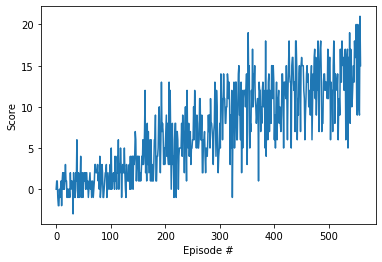

In [7]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 6. Running Agent with Pre-trained Weights

We can also try training the agent longer by increasing the passing score (15.0). The resultant performance plot is similar to the figure below:

![score15](img/884episodes_15scores.png)

### 7. Running Agent with Pre-trained Weights

We can load the pre-trained weights into the DQN agent for running.

In [9]:
agent.qnetwork_local.load_state_dict(torch.load('checkpoint1.pth'))

for eps in range(0,10):
    score = 0
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
   
    while True:
        
        action = agent.act(state, eps)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        
        agent.step(state, action, reward, next_state, done)
        state = next_state
        score += reward
        if done:
            print("score = ", score)
            break

score =  7.0
score =  1.0
score =  -1.0
score =  -1.0
score =  1.0
score =  1.0
score =  -1.0
score =  1.0
score =  2.0
score =  0.0


Finally, we can close the Banana environment.

In [10]:
env.close()